## Import Libraries

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [4]:
df = pd.read_csv("clean_data.csv")

In [5]:
df.shape

(10754, 22)

In [6]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [9]:
df.duplicated().sum()

0

In [10]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [11]:
# Completeness
df.isnull().sum()

Unnamed: 0             0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [12]:
# Accurecy types
df.dtypes

Unnamed: 0               int64
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [13]:
df.columns

Index(['Unnamed: 0', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [14]:
# delete columns not needed 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
# delete columns not needed 
df.drop(['name'], axis=1, inplace=True)

In [16]:
# delete columns not needed 
df.drop(['position_encoded'], axis=1, inplace=True)

In [17]:
# I decide to delete position encoded because its deppend on other column: "position"

In [18]:
# delete columns not needed 
df.drop(['minutes played'], axis=1, inplace=True)

In [19]:
# I decide to delete minutes played because its deppend on other column: "appearance"

In [20]:
# delete columns not needed 
df.drop(['days_injured'], axis=1, inplace=True)

In [21]:
# I decide to delete days_injured because its deppend on other column: "games_injured"

In [22]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'games_injured', 'award', 'current_value',
       'highest_value', 'winger'],
      dtype='object')

In [23]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,games_injured,award,current_value,highest_value,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,5,13,15000000,70000000,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,58,1,1500000,22000000,0


In [24]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 
                    'yellow cards', 'second yellow cards', 'red cards', 
                    'goals conceded', 'clean sheets', 
                    'games_injured', 'award', 'highest_value',  'winger']

In [25]:
for i in categorical_features:
    print(df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


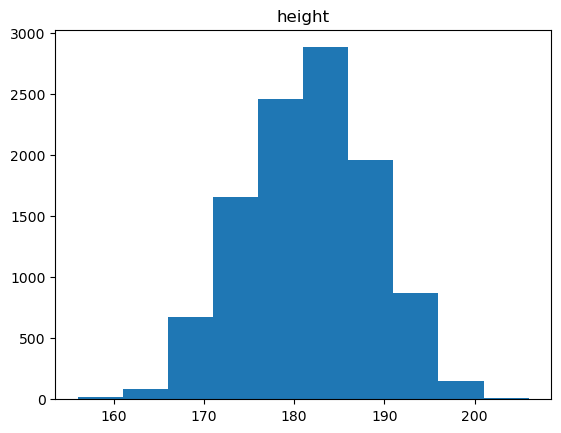

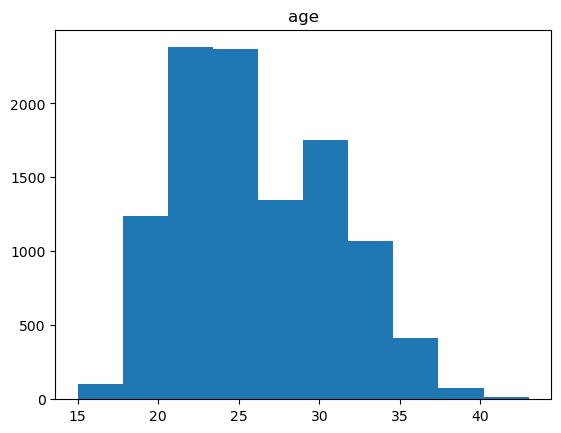

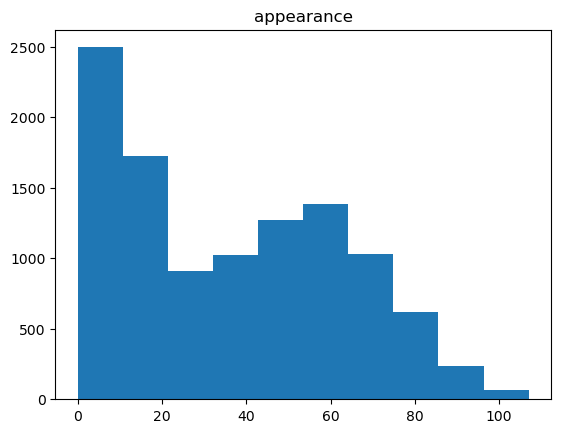

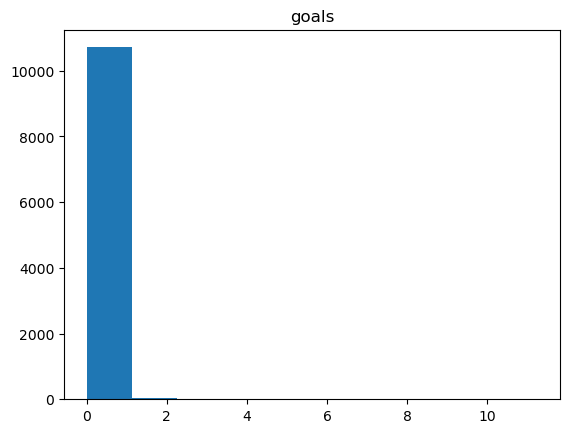

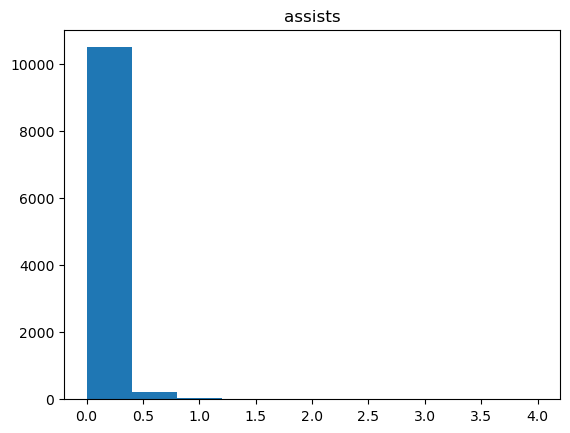

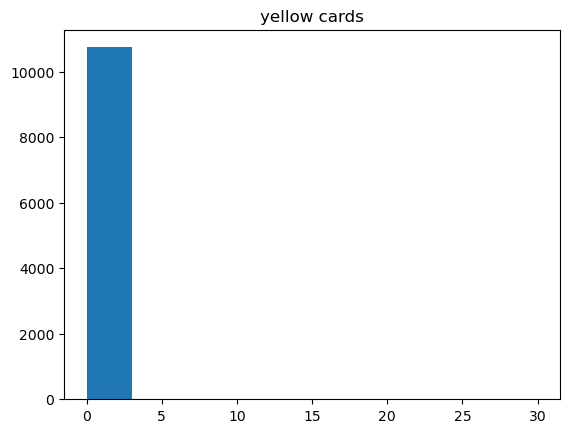

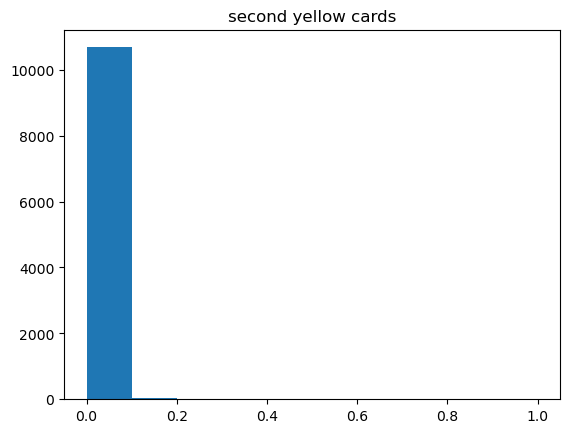

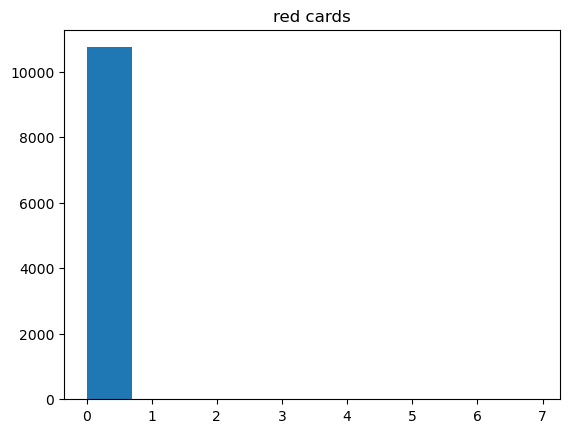

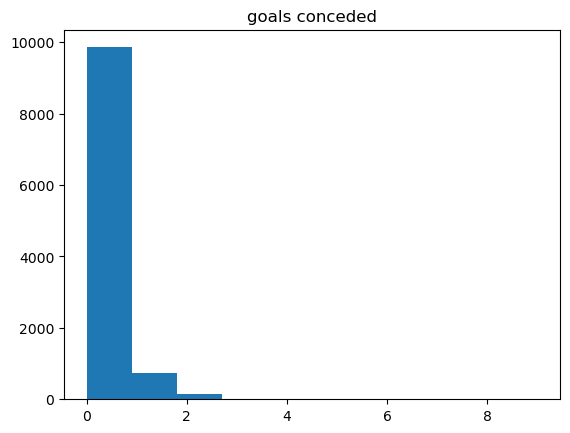

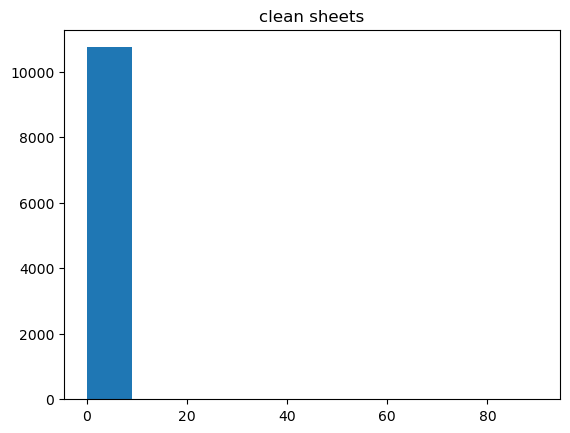

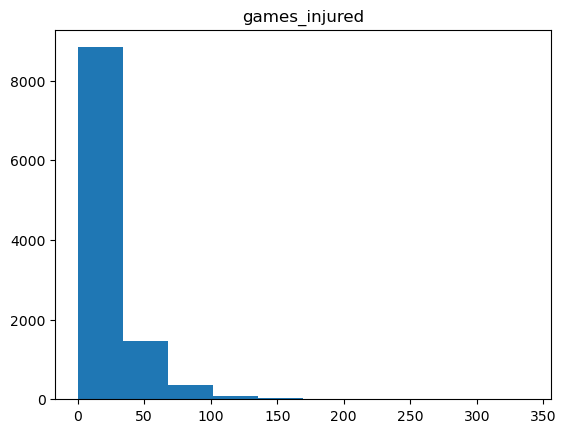

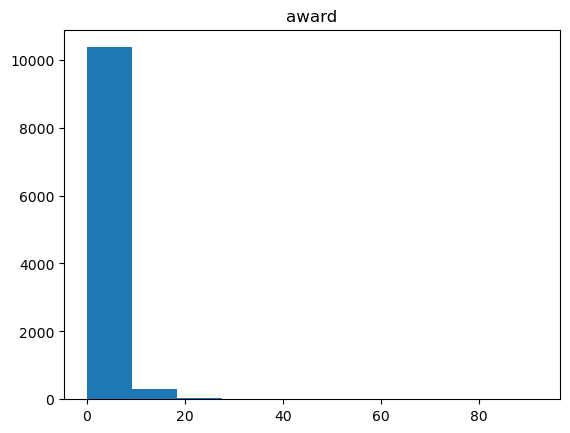

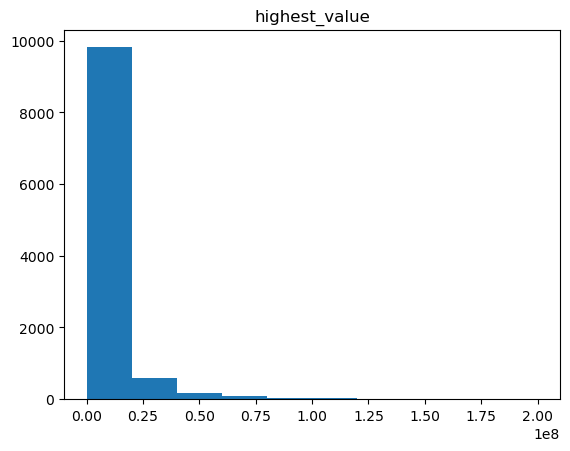

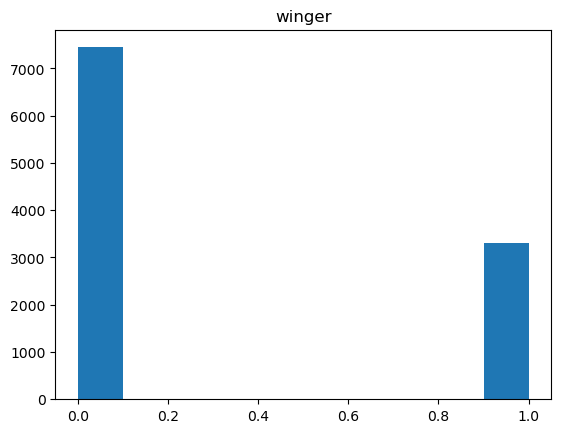

In [26]:
for i in numeric_features:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [27]:
df.shape

(10754, 17)

In [28]:
(df['current_value'] <= 8000).value_counts()

current_value
False    10587
True       167
Name: count, dtype: int64

In [29]:
df[(df['height']>= 165)].shape

(10698, 17)

In [30]:
df = df[(df['height']>= 170) & (df['height']<= 200)]

In [31]:
df.shape

(10287, 17)

In [32]:
df = df[(df['age']>= 17) & (df['age']<= 35)]

In [33]:
df.shape

(9946, 17)

In [34]:
df = df[df['appearance']>= 10]

In [35]:
df.shape

(7889, 17)

In [36]:
df = df[df['games_injured']<= 95]

In [37]:
df.shape

(7792, 17)

In [38]:
df = df[df['award']<= 50]

In [39]:
df.shape

(7789, 17)

In [40]:
df = df[df['highest_value']> 55000]

In [41]:
df.shape

(7610, 17)

In [42]:
#df = df[df['current_value']> 80000]

In [43]:
#df.shape

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [46]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,games_injured,award,current_value,highest_value,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,5,13,15000000,70000000,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,58,1,1500000,22000000,0


In [47]:
categorical_features

['team', 'position']

In [48]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [49]:
df.shape

(7610, 405)

In [50]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,True,False,False,False,False,False,False
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False


In [51]:
df['current_value'].min()

0

In [52]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['current_value'].quantile(0.35)
p80 = df['current_value'].quantile(0.80)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p80:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df['current_value_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())

current_value_category
Good_Price     3340
Cheap_Price    2626
High_Price     1644
Name: count, dtype: int64


In [53]:
p35, p80

(650000.0, 5000000.0)

In [54]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category'])

#### 3. Feature selection

In [56]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
highest_value                     0.547772
appearance                        0.504304
award                             0.280195
games_injured                     0.211288
                                    ...   
team_Perth Glory                 -0.067438
team_SV Ried                     -0.071731
clean sheets                     -0.073486
position_Goalkeeper              -0.094166
goals conceded                   -0.101508
Name: current_value_category_encoded, Length: 405, dtype: float64


In [57]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'games_injured', 'award', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [58]:
selected_features = ['appearance', 'games_injured', 'award', 'highest_value','current_value_category_encoded']

In [59]:
df = df[selected_features]
df.head()

,appearance,games_injured,award,highest_value,current_value_category_encoded
0,104,5,13,70000000,2
1,15,58,1,22000000,1
3,82,22,9,50000000,2
4,63,51,21,80000000,2
5,68,27,1,70000000,2


#### 4. Prepare train and test data

In [61]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)
y = df['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X.shape

(7610, 4)

## Buliding the Model

In [64]:
svm_classifier = SVC()

In [65]:
param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 2, 5, 10, 15, 20, 25],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [67]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 2, 5, 10, 15, 20, 25], 'gamma': [1, 2, 6],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [68]:
grid_search.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
model = grid_search.best_estimator_

## Test the Model

In [71]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [73]:
# our benchmark model
base_model = round(df['current_value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

43.89

1. Accuracy 

In [75]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7792378449408672

In [76]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8180026281208935

In [77]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[389, 107,   4],
       [ 99, 526,  53],
       [  2,  71, 271]])

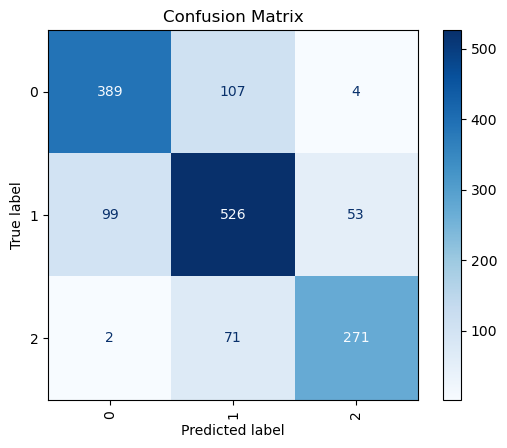

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [79]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.79


In [80]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.78


In [81]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.78


In [82]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       500
           1       0.75      0.78      0.76       678
           2       0.83      0.79      0.81       344

    accuracy                           0.78      1522
   macro avg       0.79      0.78      0.78      1522
weighted avg       0.78      0.78      0.78      1522

